In [82]:
h_0 = 3000                      # m
v_0 = 100                       # m / s
h_parachute_opening = 1000      # m

m = 80                          # kg
g = 9.81                        # m / s^2

density_air = 1.2754            # kg / m^3
density_human = 1000            # kg / m^3

k_parachute = 40
k_human = 20

dt = 0.1                        #s

In [83]:
import math

T = []
X = []
Y = []
V = []
A = []

t = 0

x = 0
y = h_0

v_x = v_0
v_y = 0

while (y > h_parachute_opening):
    t += dt
    T.append(t)

    a_x = -k_human * v_x / m
    a_y = g * (density_air / density_human - 1) - k_human * v_y / m
    A.append(math.sqrt(a_x ** 2 + a_y ** 2))

    x += v_x * dt + a_x * dt * dt / 2
    y += v_y * dt + a_y * dt * dt / 2
    X.append(x)
    Y.append(y)

    v_x += a_x * dt
    v_y += a_y * dt
    V.append(math.sqrt(v_x ** 2 + v_y ** 2))

while (y > 0):
    t += dt
    T.append(t)

    a_x = -k_human * v_x / m
    a_y = g * (density_air / density_human - 1) - k_parachute * v_y / m
    A.append(math.sqrt(a_x ** 2 + a_y ** 2))

    x += v_x * dt + a_x * dt * dt / 2
    y += v_y * dt + a_y * dt * dt / 2
    X.append(x)
    Y.append(y)

    v_x += a_x * dt
    v_y += a_y * dt
    V.append(math.sqrt(v_x ** 2 + v_y ** 2))

print(t)


104.09999999999836


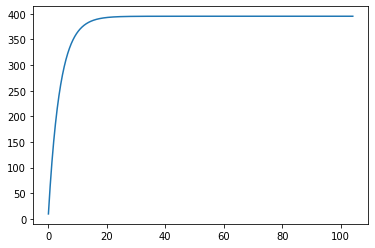

In [84]:
import matplotlib.pyplot as plt

plt.plot(T, X)

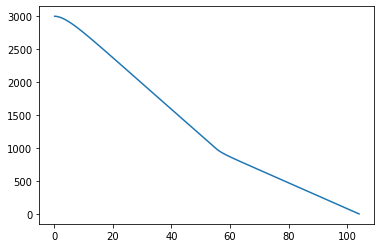

In [85]:
import matplotlib.pyplot as plt

plt.plot(T, Y)

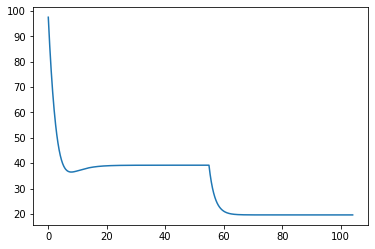

In [86]:
import matplotlib.pyplot as plt

plt.plot(T, V)

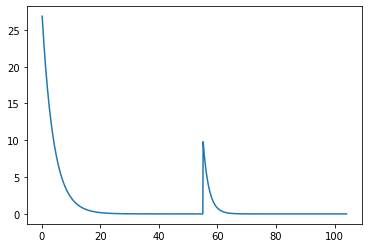

In [87]:
import matplotlib.pyplot as plt

plt.plot(T, A)

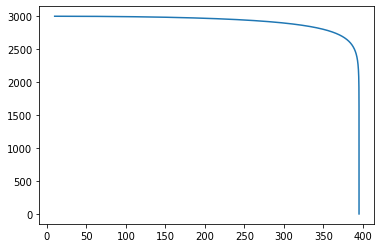

In [88]:
import matplotlib.pyplot as plt

plt.plot(X, Y)